# AI 9강 : 머신러닝 알고리즘
로지스틱 회귀, 서포트 벡터 머신

인공지능에도 여러가지 문제 해결 방법이 있으므로 적절한 분류 알고리즘을 선택해야 한다.

**영향을 주는 요인**  
1. 변수의 특성  
2. 데이터의 개수  
3. 노이즈 데이터의 양  
4. 클래스의 선형적 구분 여부  



## 머신러닝 알고리즘 훈련을 위한 단계

1. 변수를 선택하고 훈련 데이터를 수집  
2. 모델의 성능 지표를 선택  
3. 분류 모델과 최적화 알고리즘 선택  
4. 모델의 성능 평가  
5. 모델 튜닝  



## 퍼센트론 perceptron

머신러닝에서 가장 주목받는 방법인 딥러닝은 인공신경망의 원리를 차용한다.  
딥러닝의 deep은 인공신경망의 은닉층이 여러개라는 의미인데 이 때 이 은닉층을 구성하는 것이 **퍼셉트론**이다.  

우선 신경세포의 동작 방식을 알아야 한다.   
신경세포(뉴런)은 가지돌기에서 신호를 받고, 그 신호가 일정 수치 이상 강하면 축삭돌기를 통해 신호를 전달한다.  
뉴런이 가지돌기에서 받는 신호는 퍼셉트론의 입력값 $x$에 해당하고,  
축삭돌기를 통해 신경세포체로 전달되는 신호가 퍼셉트론의 출력값 $y$에 해당한다.  

**계단 함수 Step function**  
이 때, 퍼셉트론에서 신호의 강도는 가중치(weight) $W$가 결정한다. 가중치가 클 수록 해당 신호의 중요도가 커지며 각 가중치는 입력값에 따라 달라진다.  
입력값 $x$는 가중치 $w$와 곱해져 종착지 $y$로 보내지고, 곱해진 값이 임계치 threshold를 넘으면 퍼셉트론은 출력값으로 1을 출력한다

## 로지스틱 회귀 \[분류]

> 분류를 확률로 생각하는 방식

퍼셉트론 알고리즘은 선형분리 불가능 문제는 해결할 수 없으므로 퍼셉트론의 간단함을 유지하면서 퍼셉트론으로 알고리즘으로 풀 수 없는 문제를 해결하는 알고리즘을 고안했다.  


### 로지스틱 시그모이드 함수
경사하강법과 유사한 방식을 사용하나, 회귀문제가 아니라 분류문제를 해결하는 알고리즘이므로 입력값이 어떤 클래스에 분류되는지 구하기 위해 **함수**를 사용한다.  

$$f(x) = \frac{1}{1 + e^{-z}}\\z = w^{T}x = w_{0}x_{0}+w_{1}x_{1}+\cdots+w_{n}x_{n}$$

- 함수의 모양이 S형태를 띄기 때문에 붙여진 이름이다.  
- $w$ : 가중치 벡터, $x$ : 입력 데이터 변수, $T$ : 전치 행렬


In [5]:
import matplotlib.pyplot as plt
import numpy as np 

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))  # np.exp : numpy모듈의 지수함수

z = np.arange(-7, 7, 0.1)
f_x = sigmoid(z)

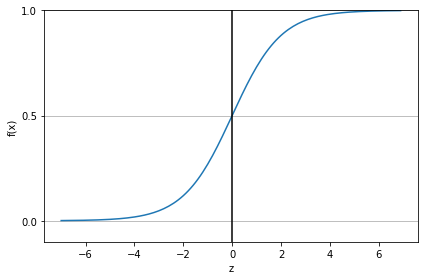

In [7]:
plt.plot(z, f_x)
plt.axvline(0.0, color="k")
plt.ylim(-0.1, 1, 1)
plt.xlabel("z")
plt.ylabel("f(x)")

plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

z값이 무한히 커지게 되면 지수함수의 값이 작아지기 때문에 1에 수렴하고  
z값이 무한히 작아지게 되면 분모가 무한히 커지기 때문에 0에 수렴한다.  
$\therefore$ 어떤 값이 들어와도 시그모이드 함수를 통하면 0~1사이의 값으로 반환되기 때문에 확률처럼 다룰 수 있게 된다.  

### [보충](https://www.youtube.com/watch?list=PLQ28Nx3M4Jrguyuwg4xe9d9t2XE639e5C&v=XnHqv4PC0-M)

**logistic vs linear**  
- logistic
    + 데이터 : 이산적
    + 목표 : 두 데이터를 분류할 수 있는 경계인 **결정경계 decision boundary**를 만드는 것
- linear
    + 데이터 : 연속적 (ex: time, weight, height)
    + 목표 : 데이터를 가장 잘 설명할 수 있는 함수를 만드는 것

**sigmoid function in tensorflow**  
```py
import tensorflow as tf

z = tf.matmul(X, theta) + b
tf.sigmoid(z) = tf.div(1., 1. + tf.exp(z)
```

**Cost Function**

LR에서도 cost function을 이용해 적절한 가중치 $w$($\theta$) 를 찾을 수 있다.  
- 결정경계가 데이터를 지나지 않을 때 cost가 0이 된다.  

수식으로 나타내면 다음과 같다.  

$h_{\theta}(x) = y then Cost = 0$ 일 때,  
$ cost(h_{\theta}(x), y) = -y log(h_{\theta}(x)) - (1-y)log(1-h_{\theta}x) $

- y가 1일때 로그함수를 돌려 얻은 값과 y가 0일때 로그함수를 다시 돌려 얻은 값을 합한다. 뭔소린지 모르겠다.

**cost function in tensorflow**

```py
def loss_fn(hypothesis, labels):  # 가설과 정답을 입력하여
    cost = -tf.reduce_mean(labels * tf.log(hypothesis) + (1-labels) * tf.log(1 - hypothesis))
    return cost  # cost를 반환
```

- hypothesis = cost 함수
- tf.reduce_mean = 차원축소

## 서포트 벡터 머신 Support Vector Machine

### 목표
마진을 최대화 하는것이 목적이다.  
  
레이블을 구분하기 위한 결정경계 (초평면이라고 한다.) 를 그렸을 때,  
초평면과 가장 가까운 훈련데이터들 사이의 거리가 **마진**이다.  
이 때 마진 계산에 사용되는 훈련데이터를 **서포트 벡터**라고 한다.  

### 장점
1. SVM을 사용하면 로지스틱 회귀를 단독으로 사용했을 때 보다 일반화를 진행할 때 오차가 낮아지는 경향이 있다.
    - 참고 : A tutorial on support vector machines for pattern recognition (1998)
2. 선형 분리 불가능 문제에서도 사용할 수 있다. 
    - 선형으로 분리할 수 없는 공간을 다차원 공간으로 간주하면 데이터를 분리할 수 있는 **분리 가능 공간**이 생긴다.
    - $=>$ 다차원 공간에서 생성한 분리 가능 공간을 2차원 공간으로 옮기게 되면 선형 분리 불가능 문제에서도 **비선형 결정 경계**를 생성할 수 있다.

### 단점
계산비용
- 다차원 공간으로 매핑하는 과정은 상당한 컴퓨팅 파워를 요한다.
- $=>$ 해결 : **커널기법**